In [22]:
#nạp dữ liệu
import pandas as pd
file_path = 'dulieuxettuyendaihoc.csv'
df = pd.read_csv(file_path,encoding='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=df[['T5','T6','T4','NGONNGU']]
x=df[['T5','T6','T4']].values
y=df[['NGONNGU']].values
# mức 20% random=16
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=16)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
#log , căn, bậc 2 3, sigmoid
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import numpy as np
#poly degree=2, np.sqrt, minmaxscaler, standardscaler, LR
#Train qua các bước
steps=[('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
       ('sqrttransform',FunctionTransformer(np.sqrt)),
       ('minmaxscaler',MinMaxScaler()),
       ('standardscaler',StandardScaler()),
       ('model',LinearRegression())]

In [25]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('minmaxscaler', MinMaxScaler()),
                ('standardscaler', StandardScaler()),
                ('model', LinearRegression())])

In [26]:
model=pipe.fit(X_train,y_train)

In [27]:
#Sinh viên tự đánh giá mô hình thông qua: score, MAE, RMSE và MAPE
y_test_pred=pipe.predict(X_test)
y_test_pred

array([[3.98057024],
       [4.55373934],
       [3.14967236],
       [3.60683063],
       [3.81960098],
       [3.22148561],
       [2.92610044],
       [3.77367013],
       [3.94666746],
       [3.83158093],
       [3.87919136],
       [3.71871444],
       [3.33913632],
       [3.82459291],
       [4.936074  ],
       [3.02111242],
       [4.84951681],
       [4.2682616 ],
       [2.46537869],
       [3.74580273]])

In [28]:
#tính cột train
y_train_pred=model.predict(X_train)
print('Train')
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Train
Score or R-Squared:  0.2267257889779406
Mean Absolute Error:  1.0054625918039217
Mean Squared Error:  1.5824860389411302
Root Mean Squared Error:  1.257969013505949
Mean Absolute Percentage Error:  0.3359154366555993


In [29]:
#tính test
print('Score or R-Squared: ', model.score(X_test,y_test))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared:  0.3050067233892839
Mean Absolute Error:  0.8595169267599058
Mean Squared Error:  1.2825883734451824
Root Mean Squared Error:  1.1325141824477
Mean Absolute Percentage Error:  0.2713051127611285


In [30]:
vT4=5.0
vT5=6.0
vT6=7.5
predicted_ngonngu=pipe.predict([[vT4,vT5,vT6]])
print('Giá trị dự báo điểm ngôn ngữ: ',predicted_ngonngu)

Giá trị dự báo điểm ngôn ngữ:  [[4.28065664]]


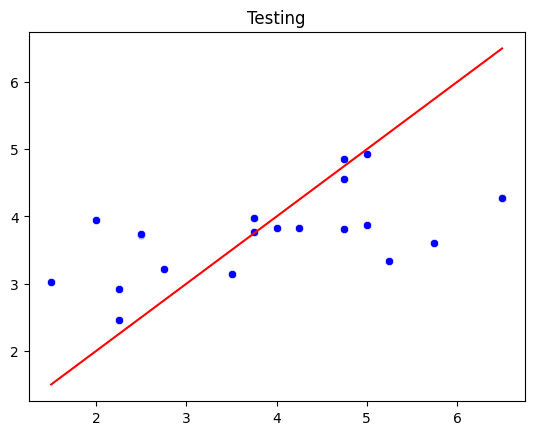

In [31]:
#vẽ Scatter test
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),markers='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),markers='o',color='b')
plt.title('Testing')
plt.show()

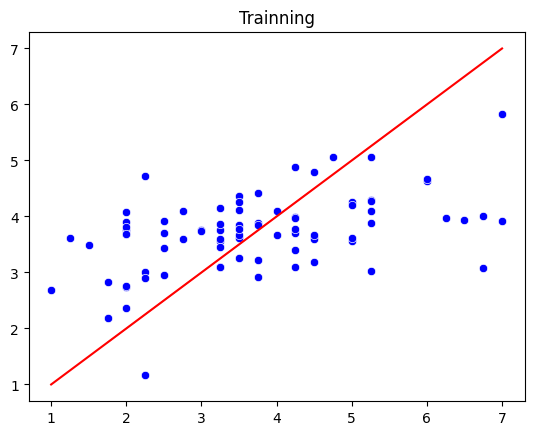

In [32]:
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),markers='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),markers='o',color='b')
plt.title('Trainning')
plt.show()

In [ ]:
dfTestValidation=pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],X_test[:,2],
                                       y_test.flatten(),
                                       y_test_pred.flatten())),
                              columns=['T4_test','T5_test','T6_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test']-dfTestValidation['y_test_predicted']
#zip tạo data frame dựa trên mảng
dfTestValidation
#Residual: sai số

,T4_test,T5_test,T6_test,y_test,y_test_predicted,Residual
0,8.5,8.3,8.3,3.75,3.980570,-0.230570
1,5.8,3.7,4.8,4.75,4.553739,0.196261
2,6.8,9.0,5.0,3.50,3.149672,0.350328
3,4.0,5.5,6.5,5.75,3.606831,2.143169
4,8.6,8.1,9.4,4.75,3.819601,0.930399
5,5.3,6.1,5.6,2.75,3.221486,-0.471486
6,8.0,6.6,6.8,2.25,2.926100,-0.676100
7,5.4,6.6,7.4,3.75,3.773670,-0.023670
8,7.1,7.7,7.9,2.00,3.946667,-1.946667
9,7.5,6.9,5.5,4.00,3.831581,0.168419


In [36]:
y_train_pred=model.predict(X_train)
dfTrainValidation=pd.DataFrame(list(zip(X_train[:,0],X_train[:,1],X_test[:,2],
                                       y_train.flatten(),
                                       y_train_pred.flatten())),
                              columns=['T4_test','T5_test','T6_train','y_train','y_train_predicted'])
dfTrainValidation['Residual']=dfTrainValidation['y_train']-dfTrainValidation['y_train_predicted']
#zip tạo data frame dựa trên mảng
dfTrainValidation

,T4_test,T5_test,T6_train,y_train,y_train_predicted,Residual
0,5.5,5.7,8.3,5.25,4.105047,1.144953
1,8.5,7.8,4.8,1.50,3.487508,-1.987508
2,8.9,8.5,5.0,6.25,3.980973,2.269027
3,4.9,6.5,6.5,1.00,2.694559,-1.694559
4,8.0,7.2,9.4,4.50,3.632669,0.867331
5,6.8,7.3,5.6,2.50,3.916612,-1.416612
6,7.4,7.1,6.8,2.75,3.592681,-0.842681
7,8.0,8.1,7.4,6.75,4.003339,2.746661
8,6.2,7.3,7.9,3.00,3.759266,-0.759266
9,6.0,5.7,5.5,2.00,3.753925,-1.753925
